In [2]:
import sys
print(sys.executable)

C:\Users\magic\anaconda3\envs\ml1\python.exe


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import make_classification

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv('../../datafiles/Behaviour of linera models/task_d.csv')
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Shuffled data

In [5]:
data2 = data.sample(frac=1)
X2 = data2.drop(['target'], axis=1).values
Y2 = data2['target'].values

<AxesSubplot:>

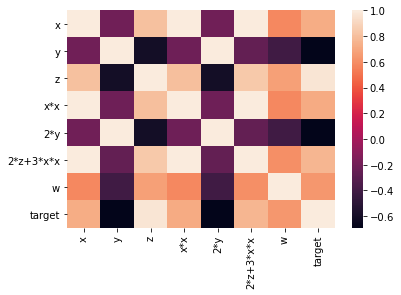

In [6]:
corre = data.corr()
sns.heatmap(corre)

Now since the above heatmap is kind off confusing. As the 0 is no correlation at all but the negative values does have negative correlation. So to really check whic two features have no correlation what so ever I have used absolut values of corre in next heatmap. So here now, the dark color clearly represents no/less correlation. 

<AxesSubplot:>

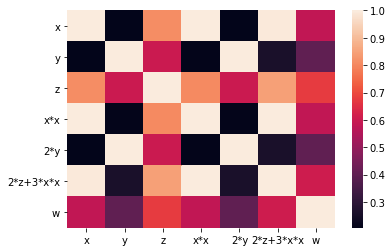

In [7]:
corre = abs(data.drop(['target'],axis=1).corr())
sns.heatmap(corre)

In [8]:
gs_lr = GridSearchCV(LogisticRegression(),{'C':list(np.logspace(-5,5,num=11, base=10.0))})
gs_lr.fit(X2,Y2)
gs_lr.best_estimator_,gs_lr.cv_results_

(LogisticRegression(C=1e-05),
 {'mean_fit_time': array([0.00438824, 0.00280204, 0.00386944, 0.00322676, 0.00292482,
         0.00377302, 0.00447893, 0.00454931, 0.00534458, 0.00468903,
         0.00499659]),
  'std_fit_time': array([0.00289074, 0.00091299, 0.00171236, 0.00022062, 0.00043785,
         0.0005452 , 0.0008872 , 0.00068083, 0.00157021, 0.00061545,
         0.00080714]),
  'mean_score_time': array([0.00054374, 0.00043788, 0.00044222, 0.        , 0.00028419,
         0.00019917, 0.00020576, 0.00063677, 0.00037704, 0.00042439,
         0.00028038]),
  'std_score_time': array([0.0004183 , 0.00046236, 0.00054354, 0.        , 0.00036315,
         0.00039835, 0.00028661, 0.00038764, 0.0004636 , 0.00040613,
         0.000391  ]),
  'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                     1000.0, 10000.0, 100000.0],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False],
    

In [9]:
gs_lr = GridSearchCV(LogisticRegression(),{'C':list(np.logspace(-5,5,num=11, base=10.0))})
gs_lr.fit(X2[:80],Y2[:80])

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                               100.0, 1000.0, 10000.0, 100000.0]})

In [10]:
gs_lr.best_estimator_,gs_lr.cv_results_

(LogisticRegression(C=0.01),
 {'mean_fit_time': array([0.00460062, 0.00466452, 0.00375609, 0.003477  , 0.00285873,
         0.00469975, 0.00430856, 0.00474014, 0.0060565 , 0.00489969,
         0.00509262]),
  'std_fit_time': array([0.00129161, 0.00052125, 0.0003888 , 0.00040944, 0.00045996,
         0.00150859, 0.00043156, 0.0007625 , 0.00128621, 0.00057997,
         0.00065853]),
  'mean_score_time': array([0.00038943, 0.00030966, 0.00018888, 0.00043249, 0.00060344,
         0.00039878, 0.00039144, 0.00054903, 0.00050035, 0.00030236,
         0.00019956]),
  'std_score_time': array([0.00047719, 0.00040498, 0.00037775, 0.00039516, 0.00049278,
         0.0004884 , 0.00047955, 0.00039558, 0.00044602, 0.00040078,
         0.00039911]),
  'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                     1000.0, 10000.0, 100000.0],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False],
     

In [11]:
gs_lr.best_estimator_.predict(X2[80:]) == Y2[80:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [12]:
Y2[80:],gs_lr.best_estimator_.predict(X2[80:])

(array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
       dtype=int64),
 array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
       dtype=int64))

### Here we are having some very wierd experience where the model is predicting with 100% accuracy across all Lambda/Regularization values and the GridSearch provides us an estimator with lowest C / highest lambda, even after shuffling the data. So i am going to go with C=1

- noise(order of 10^-2) to each element of X 

In [17]:
  +np.ones((1,7))

array([[1., 1., 1., 1., 1., 1., 1.]])

In [22]:
X3 = pd.DataFrame(X2)+np.random.normal(0.05,0.03,(100,7))

In [23]:
gs_lr = GridSearchCV(LogisticRegression(),{'C':list(np.logspace(-5,5,num=11, base=10.0))})
gs_lr.fit(X3,Y2)
gs_lr.best_estimator_,gs_lr.cv_results_

(LogisticRegression(C=1e-05),
 {'mean_fit_time': array([0.01458712, 0.00682611, 0.01099892, 0.00960793, 0.01054015,
         0.01015682, 0.011553  , 0.01146989, 0.0142487 , 0.01114411,
         0.01180434]),
  'std_fit_time': array([0.01856881, 0.00219451, 0.00143712, 0.00069166, 0.00096498,
         0.00076985, 0.00083504, 0.00091226, 0.00215115, 0.00031806,
         0.00054843]),
  'mean_score_time': array([0.002424  , 0.00298772, 0.00363226, 0.00382633, 0.00396824,
         0.00310593, 0.00372419, 0.0035708 , 0.0046072 , 0.00397878,
         0.00360565]),
  'std_score_time': array([0.00042675, 0.00055654, 0.00061816, 0.001006  , 0.0001233 ,
         0.00010801, 0.00035862, 0.00069793, 0.00065897, 0.00062921,
         0.00051809]),
  'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                     1000.0, 10000.0, 100000.0],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False],
    